chessboard found in calib_imgs/calib_0016.png


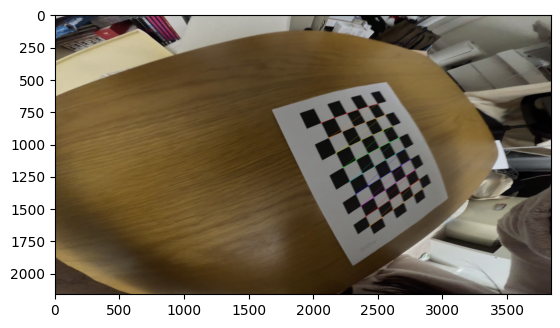

chessboard found in calib_imgs/calib_0002.png


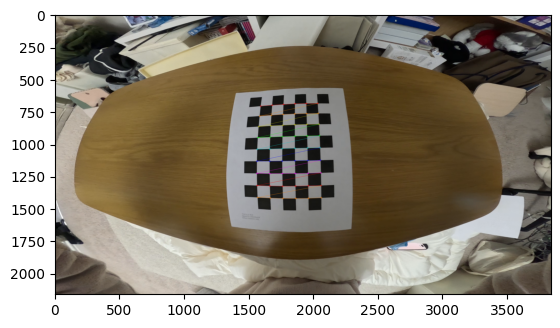

chessboard found in calib_imgs/calib_0003.png


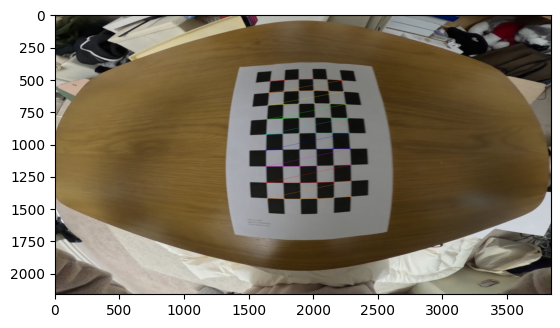

chessboard found in calib_imgs/calib_0017.png


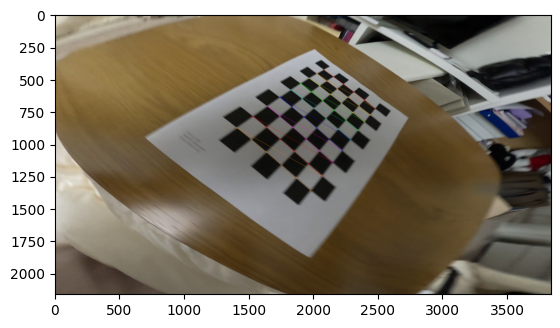

chessboard found in calib_imgs/calib_0001.png


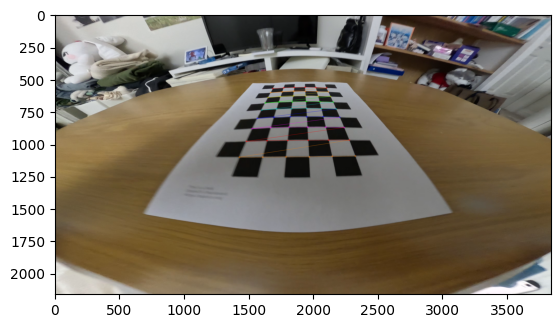

chessboard found in calib_imgs/calib_0015.png


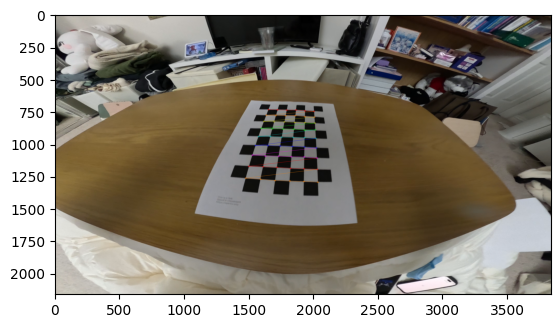

chessboard found in calib_imgs/calib_1_0009.png


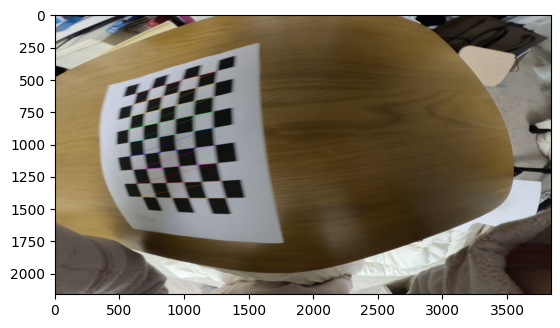

chessboard found in calib_imgs/calib_1_0008.png


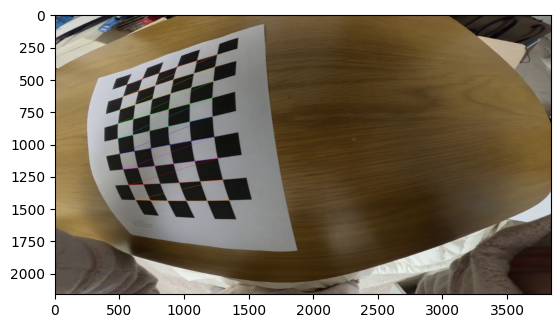

chessboard found in calib_imgs/calib_0014.png


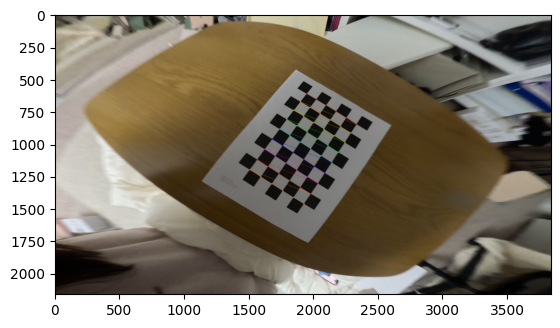

chessboard found in calib_imgs/calib_0004.png


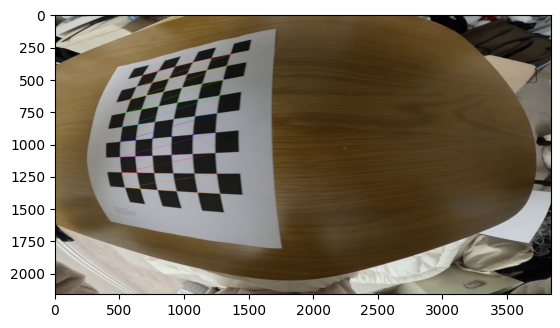

chessboard found in calib_imgs/calib_0011.png


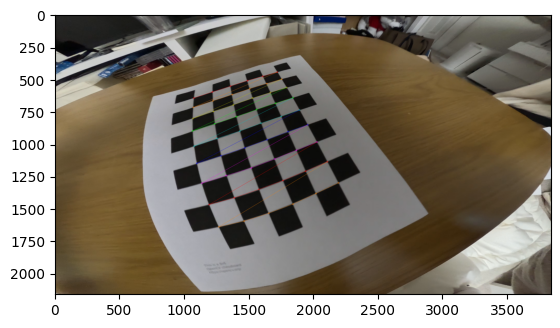

chessboard found in calib_imgs/calib_0005.png


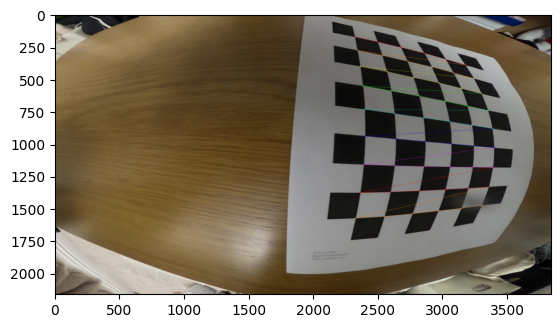

chessboard found in calib_imgs/calib_0013.png


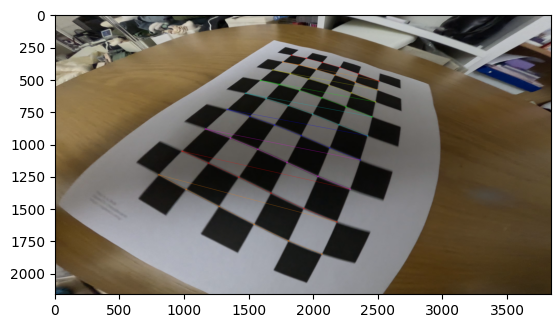

chessboard found in calib_imgs/calib_0007.png


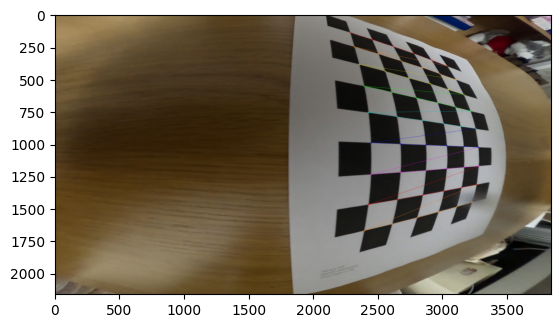

chessboard found in calib_imgs/calib_0006.png


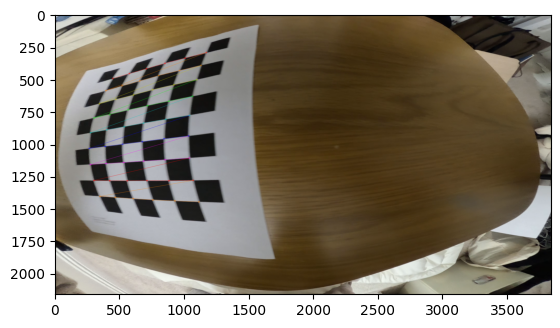

Found 15 valid images for calibration
DIM=(3840, 2160)
K=np.array([[686.2954705754651, 0.0, 1881.4639571333316], [0.0, 540.2019357725065, 946.317306910261], [0.0, 0.0, 1.0]])
D=np.array([[0.4650480468914825], [-0.33053405221995785], [0.2615091805538686], [-0.06916083496752508]])


In [2]:
import cv2
import numpy as np
import os
import glob
import matplotlib.pyplot as plt

CHECKERBOARD = (6,9)

subpix_criteria = (cv2.TERM_CRITERIA_EPS+cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
calibration_flags = cv2.fisheye.CALIB_RECOMPUTE_EXTRINSIC+cv2.fisheye.CALIB_FIX_SKEW

objp = np.zeros((1, CHECKERBOARD[0]*CHECKERBOARD[1], 3), np.float32)
objp[0,:,:2] = np.mgrid[0:CHECKERBOARD[0], 0:CHECKERBOARD[1]].T.reshape(-1, 2)

_img_shape = None
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.

# TODO: 15個に制限しているので、全ての画像(or都合のいい画像のみ)を使うようにする?
images = glob.glob('calib_imgs/*.png')[:15]

for fname in images:
    img = cv2.imread(fname)
    if _img_shape == None:
        _img_shape = img.shape[:2]
    else:
        assert _img_shape == img.shape[:2], "All images must share the same size."
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    # Find the chess board corners
    ret, corners = cv2.findChessboardCorners(gray, CHECKERBOARD, cv2.CALIB_CB_ADAPTIVE_THRESH+cv2.CALIB_CB_FAST_CHECK+cv2.CALIB_CB_NORMALIZE_IMAGE)
    # If found, add object points, image points (after refining them)
    if ret:
        print(f"chessboard found in {fname}")
        objpoints.append(objp)
        cv2.cornerSubPix(gray,corners,(3,3),(-1,-1),subpix_criteria)
        imgpoints.append(corners)
        img = cv2.drawChessboardCorners(img, CHECKERBOARD, corners, ret)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.show()
    else:
        print(f"chessboard not found in {fname}")

N_OK = len(objpoints)
K = np.zeros((3, 3))
D = np.zeros((4, 1))
rvecs = [np.zeros((1, 1, 3), dtype=np.float64) for i in range(N_OK)]
tvecs = [np.zeros((1, 1, 3), dtype=np.float64) for i in range(N_OK)]
rms, _, _, _, _ = \
    cv2.fisheye.calibrate(
        objpoints,
        imgpoints,
        gray.shape[::-1],
        K,
        D,
        rvecs,
        tvecs,
        calibration_flags,
        (cv2.TERM_CRITERIA_EPS+cv2.TERM_CRITERIA_MAX_ITER, 30, 1e-6)
    )
print("Found " + str(N_OK) + " valid images for calibration")
print("DIM=" + str(_img_shape[::-1]))
print("K=np.array(" + str(K.tolist()) + ")")
print("D=np.array(" + str(D.tolist()) + ")")

DIM = (_img_shape[::-1])
K=np.array(K.tolist())
D=np.array(D.tolist())

In [7]:
def undistort(img_path, num):
    img = cv2.imread(img_path)
    h,w = img.shape[:2]
    map1, map2 = cv2.fisheye.initUndistortRectifyMap(K, D, np.eye(3), K, DIM, cv2.CV_32FC1)
    undistorted_img = cv2.remap(img, map1, map2, interpolation=cv2.INTER_LINEAR, borderMode=cv2.BORDER_CONSTANT)
    #crop
    x,y,w,h = roi
    dst = dst[y:y+h, x:x+w]
    cv2.imwrite("undistorted/" + str(num) + ".jpg", undistorted_img)
    plt.imshow(cv2.cvtColor(undistorted_img, cv2.COLOR_BGR2RGB))
    plt.show()
    

In [8]:
for ind, fname in enumerate(images):
    undistort(fname, ind)

NameError: name 'mtx' is not defined

In [1]:
mean_error = 0
for i in range(len(objpoints)):
    imgpoints2, _ = cv2.fisheye.projectPoints(objpoints[i], rvecs[i], tvecs[i], K, D)
    #print(imgpoints2.shape)
    #print(imgpoints[i].shape)
    imgpoints2 = imgpoints2.reshape(54, 1, 2)
    #print(imgpoints2.shape)
    error = cv2.norm(imgpoints[i], imgpoints2, cv2.NORM_L2)/len(imgpoints2)
    mean_error += error
print("reprojection error: {}".format(mean_error/len(objpoints)))

NameError: name 'objpoints' is not defined